In [1]:
import os
os.chdir('../../')

In [2]:
import os
import numpy as np
import pandas as pd

save_dir = 'reports/sana/euler_dpm_unipc'
solvers = ['Euler', 'DPM-Solver', 'UniPC']
cfgs    = [1.5, 3.5, 5.5, 7.5, 9.5]
nfes    = [5, 6, 8, 10]

# 1. Load all RMSEs into a long-form DataFrame
records = []
for solver in solvers:
    for cfg in cfgs:
        for nfe in nfes:
            fn = f"{solver}_{cfg}_{nfe}.txt"
            path = os.path.join(save_dir, fn)
            if os.path.isfile(path):
                try:
                    rmse = float(open(path).readline())
                except Exception:
                    rmse = np.nan
            else:
                rmse = np.nan
            records.append({
                'CFG':    cfg,
                'Solver': solver,
                'NFE':    nfe,
                'RMSE':   rmse
            })

df_long = pd.DataFrame(records)

# 2. For each CFG, pivot into a nice 2D table (rows=Solver, cols=NFE)
for cfg in cfgs:
    df_pivot = (
        df_long[df_long['CFG'] == cfg]
        .pivot(index='Solver', columns='NFE', values='RMSE')
        .reindex(index=solvers, columns=nfes)
    )
    df_pivot.index.name = 'Solver'
    df_pivot.columns.name = 'NFE'
    print(f"\nCFG = {cfg}")
    print(df_pivot.to_string(float_format='{:,.4f}'.format))

print("\nDone.")



CFG = 1.5
NFE            5      6      8      10
Solver                                
Euler      0.5564 0.5160 0.4584 0.4156
DPM-Solver 0.5243 0.4832 0.4310 0.3922
UniPC      0.5376 0.5245 0.4620 0.4068

CFG = 3.5
NFE            5      6      8      10
Solver                                
Euler      0.8094 0.7804 0.7318 0.6913
DPM-Solver 0.8007 0.7754 0.7327 0.6946
UniPC      0.9218 0.9235 0.9077 0.8994

CFG = 5.5
NFE            5      6      8      10
Solver                                
Euler      1.0903 1.0736 1.0439 1.0181
DPM-Solver 1.0839 1.0700 1.0459 1.0237
UniPC      1.2366 1.2367 1.2517 1.2781

CFG = 7.5
NFE            5      6      8      10
Solver                                
Euler      1.2694 1.2573 1.2410 1.2274
DPM-Solver 1.2626 1.2519 1.2391 1.2287
UniPC      1.5242 1.4857 1.4843 1.5078

CFG = 9.5
NFE            5      6      8      10
Solver                                
Euler      1.3989 1.3837 1.3687 1.3606
DPM-Solver 1.3901 1.3775 1.3650 1.3590
UniPC    

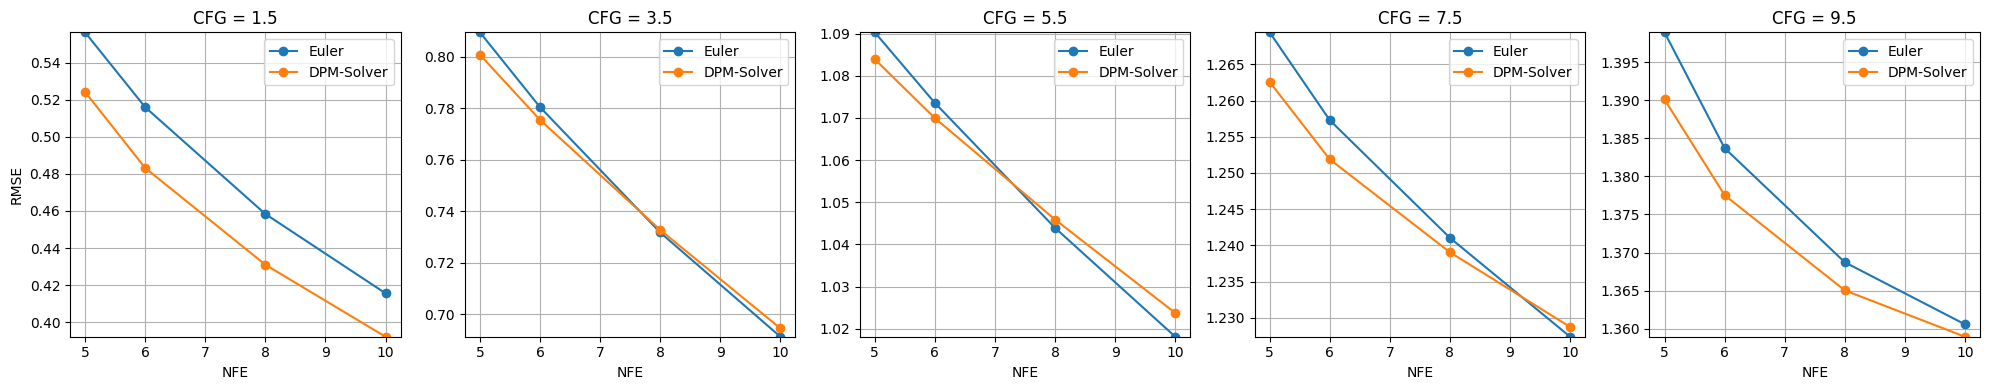

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

save_dir = 'reports/sana/euler_dpm_unipc'
solvers = ['Euler', 'DPM-Solver']
cfgs    = [1.5, 3.5, 5.5, 7.5, 9.5]
nfes    = [5, 6, 8, 10]

# Load RMSEs into DataFrame
records = []
for solver in solvers:
    for cfg in cfgs:
        for nfe in nfes:
            path = os.path.join(save_dir, f"{solver}_{cfg}_{nfe}.txt")
            if os.path.isfile(path):
                try:
                    rmse = float(open(path).readline())
                except Exception:
                    rmse = np.nan
            else:
                rmse = np.nan
            records.append({'CFG': cfg, 'Solver': solver, 'NFE': nfe, 'RMSE': rmse})

df = pd.DataFrame(records)

# Create horizontal subplots without shared y-axis
fig, axes = plt.subplots(1, len(cfgs), figsize=(20, 4), sharey=False)

for ax, cfg in zip(axes, cfgs):
    pivot = (
        df[df['CFG'] == cfg]
        .pivot(index='Solver', columns='NFE', values='RMSE')
        .reindex(index=solvers, columns=nfes)
    )
    for solver in solvers:
        y = pivot.loc[solver].values
        ax.plot(nfes, y, marker='o', label=solver)
    # Auto-set y-limits based on data
    y_vals = pivot.values.flatten()
    y_vals = y_vals[~np.isnan(y_vals)]
    ymin, ymax = y_vals.min(), y_vals.max()
    ax.set_ylim(ymin, ymax)
    
    ax.set_title(f'CFG = {cfg}')
    ax.set_xlabel('NFE')
    if cfg == cfgs[0]:
        ax.set_ylabel('RMSE')
    ax.grid()        
    ax.legend()

plt.tight_layout()
plt.show()
